# Building a vehicle sales model

Our overall goal for the notebook is to build the best regression model you can to predict the final selling price of a vehicle using the data in the `car_sales.csv` data.

In [2]:
# import libraries we will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## 1 introducing the data

In this notebook we will work with a data set on vehicle prices found on Kaggle.com, https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho. (car detals v3.csv)

These data provide the selling price of vehicles as well as various features that may or may not be related to those selling prices.

#### a. load the data

It is stored in the file `car_sales.csv` in the `Data` folder of the repository. After loading the data look at the first five rows of the dataset. Then run `cars.info()`, are there any missing values?

In [3]:
cars = pd.read_csv("car_sales.csv")

In [4]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8127 non-null   float64
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 825.6+ KB


mileage, engine, max_power, torque and seats are all missing values.

##### b. feature description

- `name`: the name of the vehicle that was sold
- `year`: the year that the vehicle was made
- `selling_price`: the price of the vehicle when it was sold, what we want to predict
- `km_driven`: the number of kilometers the vehicle had driven by the time it was sold
- `fuel`: what kind of fuel the vehicle takes
- `seller_type`: the kind of entity selling the vehicle
- `transmission`: the kind of transmission in the vehicle
- `owner`: how many owners has this vehicle had
- `mileage`: how many kilometers per liter the vehicle is expected to get <i>Note the edit from "hour" to "liter", "hour" was a typo</i>
- `engine`: size of the engine in cubic centimeters
- `max_power`: the maximum horsepower of the vehicle
- `torque`: the torque of the vehicle
- `seats`: the number of seats in the vehicle

## 2 data preprocessing

#### a. missing values
the ratio of missing values is less than 5%, so we simply remove the missing values.

In [6]:
cars = cars.dropna()

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7905 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7905 non-null   object 
 1   year           7905 non-null   int64  
 2   selling_price  7905 non-null   int64  
 3   km_driven      7905 non-null   float64
 4   fuel           7905 non-null   object 
 5   seller_type    7905 non-null   object 
 6   transmission   7905 non-null   object 
 7   owner          7905 non-null   object 
 8   mileage        7905 non-null   object 
 9   engine         7905 non-null   object 
 10  max_power      7905 non-null   object 
 11  torque         7905 non-null   object 
 12  seats          7905 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 864.6+ KB


#### b. data clean
Looking at the first five rows you can notice that the columns mileage, engine and max_power represent numeric variables, but currently contain text. Before doing any modeling you will have to clean the data a little bit.

In [8]:
def clean_column(text):
    return float(text.split()[0])

In [9]:
cars['mileage'] = cars['mileage'].apply(clean_column)
cars['engine'] = cars['engine'].apply(clean_column)
cars['max_power'] = cars['max_power'].apply(clean_column)

#### c. data engineering
We should also transform year slightly. These data were uploaded in 2020, meaning we can use 2020 as a reference year to calculate the age of the car at the moment it was sold. Create a new column called age that calculates the age of the car using 2020 as the reference year.

In [10]:
cars['age'] = 2020 - cars['year']

#### d. variable summary

<u>Outcome Variable</u>
- `selling_price` 

<u>Continuous Features</u>
- `km_driven` 
- `mileage`
- `engine`
- `max_power`
- `seats`
- `age`

<u>Categorical Features</u>
- `fuel`
- `seller_type`
- `transmission`
- `owner`

We will ignore `torque` because it would require more cleaning

## 3 Train test split
The first step in predictive modeling is performing a train test split. Perform a train test split on these data, setting aside  20% of the data as a test set. Choose a random_state so your results are reproducible.


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
cars_train, cars_test = train_test_split(cars.copy(),
                                            test_size=.2,
                                            random_state=440,
                                            shuffle=True)

## 

## 4. Exploratory data analysis (EDA)

After the train test split we can work on some exploratory data analysis. Here is where we start to look at the data and see if we can generate any modeling ideas or hypotheses. You will make a series of plots and learn a modeling trick that should improve any models we make.

#### a.  make histograms of selling_price and km_driven using the training data.

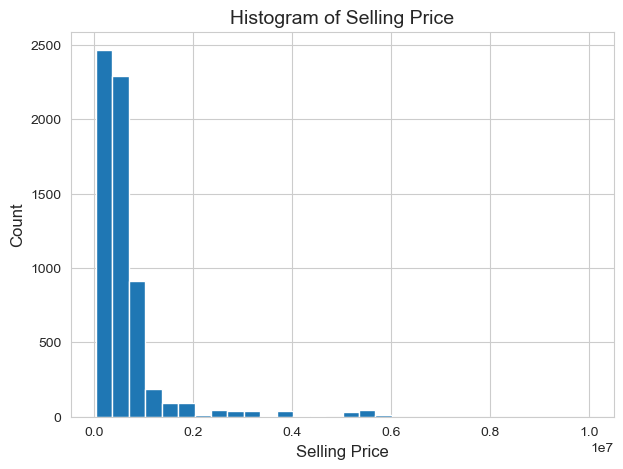

In [17]:
plt.figure(figsize=(7,5))

plt.hist(cars_train.selling_price, bins=30)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.ylabel("Count", fontsize=12)
plt.xlabel("Selling Price", fontsize=12)

plt.title("Histogram of Selling Price", fontsize=14)

plt.show()

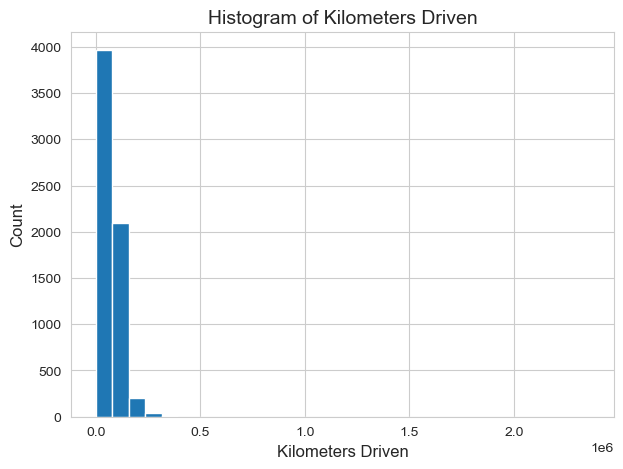

In [18]:
plt.figure(figsize=(7,5))

plt.hist(cars_train.km_driven, bins=30)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.ylabel("Count", fontsize=12)
plt.xlabel("Kilometers Driven", fontsize=12)

plt.title("Histogram of Kilometers Driven", fontsize=14)

plt.show()

 the distribution for both of them is highly skewed it can be useful to perform a  log
 transformation on the data. This is done to hopefully improve the assumption of a linear relationship.

In [36]:
cars_train['log_sell'] = np.log10(cars_train['selling_price'])
cars_train['log_km'] = np.log10(cars_train['km_driven'])

cars_test['log_sell'] = np.log10(cars_test['selling_price'])
cars_test['log_km'] = np.log10(cars_test['km_driven'])

#### b.
Now use seaborn's pairplot, https://seaborn.pydata.org/generated/seaborn.pairplot.html to plot selling_price against km_driven, mileage and age.

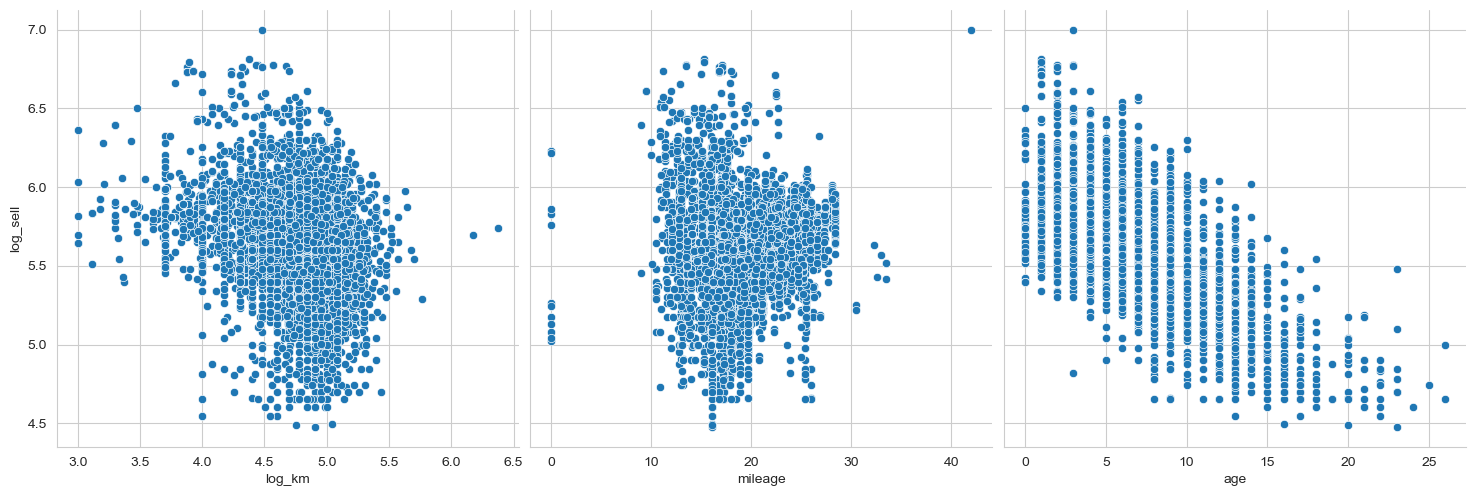

In [43]:
sns.pairplot(cars_train,
                y_vars = ['log_sell'],
                x_vars = ['log_km', 'mileage', 'age'],
                height = 5)

plt.show()

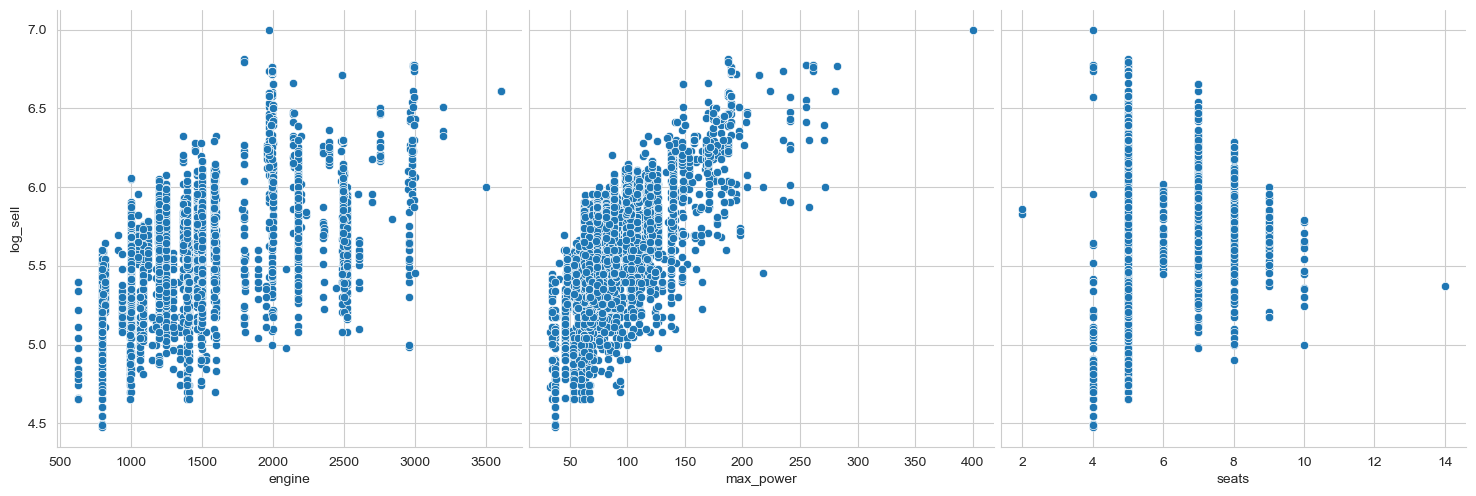

In [112]:
sns.pairplot(cars_train,
                y_vars = ['log_sell'],
                x_vars = ['engine','max_power','seats'],
                height = 5)

plt.show()

##### c.

Another part of EDA is calculating descriptive statistics.

One statistic of interest to us in this situation is the <i>Pearson correlation coefficient</i>. 
Calculate the correlation between `log_sell` and the columns we have previously plotted.

In [23]:
cars_train[['log_sell', 'log_km', 'mileage', 'age']].corr()

,log_sell,log_km,mileage,age
log_sell,1.000000,-0.362105,-0.037412,-0.699555
log_km,-0.362105,1.000000,-0.124318,0.538306
mileage,-0.037412,-0.124318,1.000000,-0.330155
age,-0.699555,0.538306,-0.330155,1.000000


In [113]:
cars_train[['log_sell', 'log_km', 'mileage', 'age','max_power','engine', 'seats']].corr().log_sell.sort_values(ascending=False)

log_sell     1.000000
max_power    0.732945
engine       0.520356
seats        0.190833
mileage     -0.037412
log_km      -0.362105
age         -0.699555
Name: log_sell, dtype: float64

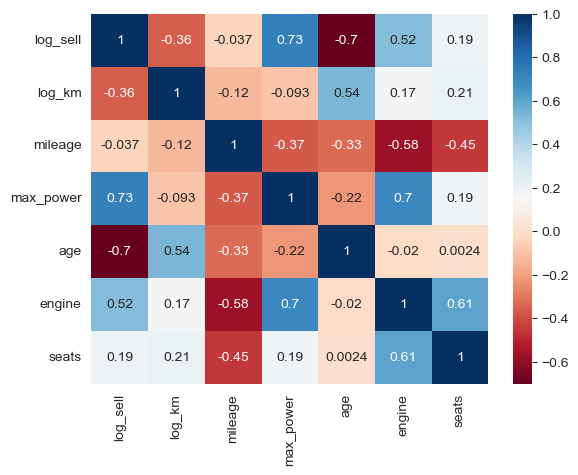

In [114]:
sns.heatmap(cars_train[['log_sell', 'log_km', 'mileage', 'max_power''age','engine', 'seats']].corr(), annot=True, cmap="RdBu")
plt.show()

##### d. 

One way to examine if a cateorical variable has an impact on an outcome variable is to compare the mean or median of the outcome variable among the different categories.

In [30]:
print("Mean by 'fuel'")
print("=====================")
print(cars_train.groupby('fuel').log_sell.mean())

print()

print("Median by 'fuel'")
print("=====================")
print(cars_train.groupby('fuel').log_sell.median())

Mean by 'fuel'
fuel
CNG       5.466341
Diesel    5.748693
LPG       5.282560
Petrol    5.523187
Name: log_sell, dtype: float64

Median by 'fuel'
fuel
CNG       5.508517
Diesel    5.740363
LPG       5.301030
Petrol    5.544068
Name: log_sell, dtype: float64


In [31]:
print("Mean by 'seller_type'")
print("=====================")
print(cars_train.groupby('seller_type').log_sell.mean())

print()

print("Median by 'seller_type'")
print("=====================")
print(cars_train.groupby('seller_type').log_sell.median())

Mean by 'seller_type'
seller_type
Dealer              5.954911
Individual          5.586135
Trustmark Dealer    5.843837
Name: log_sell, dtype: float64

Median by 'seller_type'
seller_type
Dealer              5.845098
Individual          5.602060
Trustmark Dealer    5.812913
Name: log_sell, dtype: float64


In [33]:
print("Mean by 'transmission'")
print("=====================")
print(cars_train.groupby('transmission').log_sell.mean())

print()

print("Median by 'transmission'")
print("=====================")
print(cars_train.groupby('transmission').log_sell.median())

Mean by 'transmission'
transmission
Automatic    6.120124
Manual       5.574769
Name: log_sell, dtype: float64

Median by 'transmission'
transmission
Automatic    6.070002
Manual       5.602060
Name: log_sell, dtype: float64


In [32]:
print("Mean by 'owner'")
print("=====================")
print(cars_train.groupby('owner').log_sell.mean())

print()

print("Median by 'owner'")
print("=====================")
print(cars_train.groupby('owner').log_sell.median())

Mean by 'owner'
owner
First Owner             5.744984
Fourth & Above Owner    5.268251
Second Owner            5.494057
Third Owner             5.354053
Name: log_sell, dtype: float64

Median by 'owner'
owner
First Owner             5.740363
Fourth & Above Owner    5.267172
Second Owner            5.511883
Third Owner             5.352183
Name: log_sell, dtype: float64


#### e 
Another way to investigate the potential impact of categorical variables is to make plots examining the distribution of the outcome variable for each different category. 

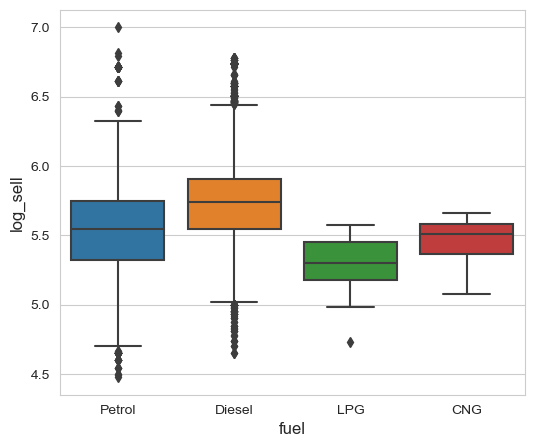

In [34]:
## Boxplot for fuel
plt.figure(figsize=(6,5))

sns.boxplot(data = cars_train,
               y = 'log_sell',
               x = 'fuel')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("log_sell", fontsize=12)
plt.xlabel("fuel", fontsize=12)

plt.show()

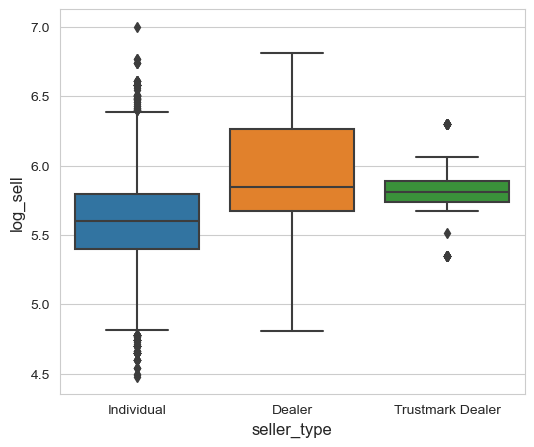

In [35]:
## Boxplot for seller_type
plt.figure(figsize=(6,5))

sns.boxplot(data = cars_train,
               y = 'log_sell',
               x = 'seller_type')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("log_sell", fontsize=12)
plt.xlabel("seller_type", fontsize=12)

plt.show()

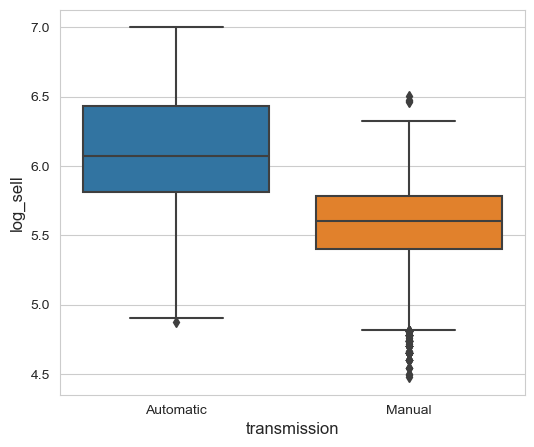

In [36]:
## Boxplot for transmission
plt.figure(figsize=(6,5))

sns.boxplot(data = cars_train,
               y = 'log_sell',
               x = 'transmission')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("log_sell", fontsize=12)
plt.xlabel("transmission", fontsize=12)

plt.show()

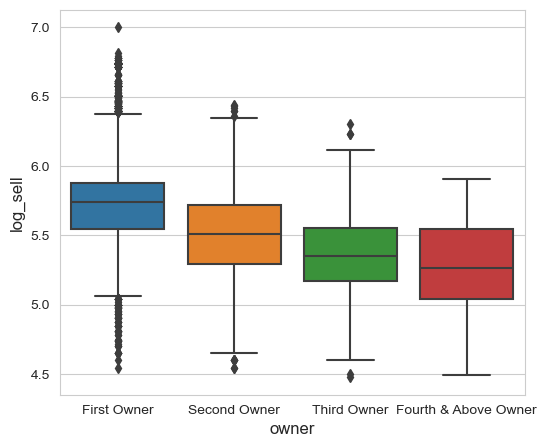

In [39]:
## Boxplot for owner
plt.figure(figsize=(6,5))

sns.boxplot(data = cars_train,
               y = 'log_sell',
               x = 'owner',
             order = ['First Owner', 'Second Owner',
                           'Third Owner', 'Fourth & Above Owner'])

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("log_sell", fontsize=12)
plt.xlabel("owner", fontsize=12)

plt.show()

#####  data analysis

- `transmission` type seems to impact the selling price of a vehicle, in particular manual transmissions appear to have a lower selling price than automatics
- `seller_type` seems to have an impact between "dealer" and "non-dealer"
- `fuel` seems like a less important variable
- `owner` seems to have some effect on the selling price of a vehicle.

#### outliers:

As can be seen from the boxplots above, there are outliers in the dataset. We will identify the outliers based on the InterQuartile Range rule.

It is not acceptable to drop an observation just because it is an outlier. They can be legitimate observations and it’s important to investigate the nature of the outlier before deciding whether to drop it or not. We are allowed to delete outliers in two cases:

- Outlier is due to incorrectly entered or measured data
- Outlier creates a significant association

In [28]:
cars_train['dealer'] = 1
cars_train.loc[cars_train.seller_type == 'Individual', 'dealer'] = 0

cars_test['dealer'] = 1
cars_test.loc[cars_test.seller_type == 'Individual', 'dealer'] = 0

It appears that different `owner` categories lead to different selling prices. However, it is difficult to tell if this variable is capturing a new signal, or is just reflecting a possible relationship between selling price and the age of the vehicle.

To see what is meant by this statement make a box and whisker plot with `age` on the vertical axis and `owner` on the horizontal. Then make a column called `owner_number` that is `1` when `owner` is `"First Owner"`, is `2` when `owner` is `"Second Owner"` and so on. Calculate the Pearson correlation between `age` and `owner_number`.

In [40]:
cars_train['owner_number'] = 1
cars_train.loc[cars_train.owner=='Second Owner', 'owner_number'] = 2
cars_train.loc[cars_train.owner=='Third Owner', 'owner_number'] = 3
cars_train.loc[cars_train.owner=='Fourth & Above Owner', 'owner_number'] = 4 

In [41]:
cars_train[['owner_number', 'age']].corr()

,owner_number,age
owner_number,1.000000,0.512062
age,0.512062,1.000000


The takeaway:

there is a fair amount of correlation between the age of a vehicle and the number of owners the vehicle has had. From the previous notebook we already know that `log_sell` and `age` have a pretty strong correlation, so it makes sense that `owner` and `log_sell` would also be correlated.


From a predictive modeling sense this means that including `owner` as a categorical feature in a model that also includes `age` may not lead to as huge an improvement to the model as we originally thought.

##### f. Make any dummy variable for transmission and owner.

In [29]:
cars_train['automatic'] = 1
cars_train.loc[cars_train.transmission=='Manual', 'automatic'] = 0

cars_test['automatic'] = 1
cars_test.loc[cars_test.transmission=='Manual', 'automatic'] = 0

In [37]:
cars_train['first_owner'] = pd.get_dummies(cars_train['owner'])['First Owner']
cars_train['second_owner'] = pd.get_dummies(cars_train['owner'])['Second Owner']
cars_train['third_owner'] = pd.get_dummies(cars_train['owner'])['Third Owner']

cars_test['first_owner'] = pd.get_dummies(cars_test['owner'])['First Owner']
cars_test['second_owner'] = pd.get_dummies(cars_test['owner'])['Second Owner']
cars_test['third_owner'] = pd.get_dummies(cars_test['owner'])['Third Owner']

#### g. a list of variables <i>might</i> be good for a model predicting `log_sell`
- `max_power`
- `age`
- `engine`
- `log_km`
- `seats`
- `dealer`
- `automatic`
- `owner`

<u>One-hot Encoded Variables</u>
- `automatic`: `1` if `transmission == "Automatic"`, `0` otherwise
- `dealer`: `1` if `seller_type != "Individual"`, `0` otherwise
- `first_owner`: `1` if `owner == "First Owner"`, `0` otherwise
- `second_owner`: `1` if `owner == "Second Owner"`, `0` otherwise
- `third_owner`: `1` if `owner == "Third Owner"`, `0` otherwise

## 5. Model comparison

 we will work through a few different model selection procedures.

##### a. Baseline model

When doing predictive modeling it is good practice to have a <i>baseline model</i> which is a simple "model" solely for comparison purposes. These are not, typically, complex or good models, but they are important reference points to give us a sense of how well our models are actually performing.

A standard regression model baseline is to just predict the average value of $y$ for any value of $X$. In this setting that model looks like this:

$$
\text{Baseline Model: } \ \ \ \ \log\left(\text{Selling Price}\right) = E(\log\left(\text{Selling Price}\right)) + \epsilon,
$$

where $\epsilon$ is some random noise.

estimate $E(\log\left(\text{Selling Price}\right))$ using the training set.

In [27]:
cars_train.log_sell.mean()

5.645309905778108

##### b. best  feature subset selection for Linear Regression

 implement  5-fold cross-validation (CV) to compare the baseline model and linear regression model to see which one has the lowest average cross-validation mean squared error (MSE)

In [22]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [47]:
# This function was modified from stackexchange user hughdbrown 
# at this link, 
# https://stackoverflow.com/questions/1482308/how-to-get-all-subsets-of-a-set-powerset

# This returns the power set of a set minus the empty set
def powerset(s):
    power_set = []
    x = len(s)
    for i in range(1 << x):
        power_set.append([s[j] for j in range(x) if (i & (1 << j))])
        
    return power_set[1:]

In [48]:
potential_features = ['max_power',
                         'age',
                         'engine',
                         'log_km',
                         'seats',
                         'dealer',
                         'automatic',
                         'mileage',
                         'owner']

all_models = ['baseline']
all_models.extend(powerset(potential_features))

for i in range(len(all_models)):
    if 'owner' in all_models[i]:
        all_models[i].remove('owner')
        all_models[i].extend(['first_owner', 'second_owner', 'third_owner'])

In [72]:
mses = np.zeros((len(all_models), 5))

kfold = KFold(5,
             random_state = 614,
             shuffle=True)

j = 0
for train_index, test_index in kfold.split(cars_train):
    cars_tt = cars_train.iloc[train_index]
    cars_ho = cars_train.iloc[test_index]
    
    i = 0
    for model in all_models:
        if model == "baseline":
            #print(model)
            pred = np.power(10,cars_tt.log_sell.mean()*np.ones(len(cars_ho)))
            
            mses[i, j] = mean_squared_error(cars_ho.selling_price, pred)
        else:
            if len(model) == 1:
                #print(model)
                reg = LinearRegression(copy_X = True)
                
                reg.fit(cars_tt[model].values.reshape(-1,1),
                           cars_tt.log_sell)
                
                pred = np.power(10,reg.predict(cars_ho[model].values.reshape(-1,1)))
                
                mses[i,j] = mean_squared_error(cars_ho.selling_price, pred)
            else:
                reg = LinearRegression(copy_X = True)
                
                reg.fit(cars_tt[model].values,
                           cars_tt.log_sell)
                
                pred = np.power(10,reg.predict(cars_ho[model].values))
                
                mses[i,j] = mean_squared_error(cars_ho.selling_price, pred)

        i = i + 1
    j = j + 1

In [59]:
np.min(np.mean(np.sqrt(mses), axis=1))

351093.2402669034

In [60]:
all_models[np.argmin(np.mean(np.sqrt(mses), axis=1))]

['max_power', 'age', 'engine', 'log_km', 'seats', 'dealer', 'automatic']

##### c. Lasso

Now attempt to use lasso regression for feature selection on a model regressing onto all of the features you considered in best subsets regression.

How do the results compare with what we found in <i>b.</i>?

<i>Hint: remember to scale continuous features with `StandardScaler` first.</i>

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [62]:
scaled_data = np.zeros((len(cars_train), 11))

scaler = StandardScaler()
scaled_data[:,:6] = scaler.fit_transform(cars_train[['mileage', 'max_power',
                                                          'age', 'engine', 
                                                          'log_km', 'seats']])

scaled_data[:,6] = cars_train.dealer.values
scaled_data[:,7] = cars_train.automatic.values
scaled_data[:,8] = cars_train.first_owner.values
scaled_data[:,9] = cars_train.second_owner.values
scaled_data[:,10] = cars_train.third_owner.values

In [63]:
alphas = [0.00001,0.0001,0.001,0.005,0.0075,0.01,0.015,0.05,0.1,1]

coefs = np.zeros((len(alphas), 11))

for i,alpha in enumerate(alphas):
    lasso = Lasso(alpha = alpha, max_iter = 100000)
    lasso.fit(scaled_data, cars_train.log_sell.values)
    
    coefs[i, :] = lasso.coef_
    
pd.DataFrame(coefs, 
                index=["alpha = " + str(alpha) for alpha in alphas],
                columns=['mileage', 'max_power',
                          'age', 'engine', 
                          'log_km', 'seats',
                          'dealer', 'automatic',
                          'first_owner', 'second_owner',
                          'third_owner'])

,mileage,max_power,age,engine,log_km,seats,dealer,automatic,first_owner,second_owner,third_owner
alpha = 1e-05,0.041477,0.159735,-0.173153,0.078793,-0.015459,0.016406,0.045135,0.073217,0.053049,0.025459,0.007582
alpha = 0.0001,0.041159,0.159792,-0.173587,0.078745,-0.015389,0.016142,0.044754,0.072203,0.044724,0.017024,-0.000000
alpha = 0.001,0.038093,0.160656,-0.176582,0.078007,-0.014933,0.013710,0.040781,0.062348,0.027664,0.000000,-0.000553
alpha = 0.005,0.024142,0.165355,-0.185892,0.073672,-0.013160,0.003005,0.022006,0.019435,0.012941,-0.000000,-0.000000
alpha = 0.0075,0.016471,0.168730,-0.190805,0.068335,-0.011973,0.000000,0.009802,0.000000,0.003632,-0.000000,-0.000000
alpha = 0.01,0.009846,0.169527,-0.193771,0.061363,-0.009042,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000
alpha = 0.015,0.000000,0.169179,-0.196086,0.049690,-0.002077,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000
alpha = 0.05,0.000000,0.162562,-0.164299,0.019621,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000
alpha = 0.1,-0.000000,0.136092,-0.120636,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000
alpha = 1,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000


The results of the lasso feature selection process largely agree with the model I found using best subsets selection. The key difference with lasso is that it suggests the model only including age, max_power and engine. We can examine the rmse results to see how this model compares with the "best" one, it is likely close.

In [64]:
lasso_model = ['age', 'max_power', 'engine']

check_number = [i for i in range(len(all_models)) if set(all_models[i]) == set(lasso_model)][0]

In [65]:
## lasso model
np.mean(np.sqrt(mses), axis=1)[check_number]

409778.53492145473

In [66]:
# Baseline model
np.mean(np.sqrt(mses), axis=1)[0]

832857.4615133815

In [67]:
all_models[0]

'baseline'

#### d. KNN
While we have only covered linear regression model types up to this point there are other regression models. One <i>nonparametric</i> approach is to use <i>$k$-nearest neighbors regression</i>.

This model works by taking the average value of $y$ for $X$'s $k$ nearest neighbors in the training set, where nearest here means the observations in the training set that are closest to $X$ in terms of some distance measure (like Euclidean distance) and $k$ is chosen prior to fitting the model. This model can be fit using `sklearn`'s `KNeighborsRegressor`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html</a>.

Using only continuous features from your best linear regression model fit a $k$-nearest neighbors regression model with $k=5, 10, 15, 20, 25$ and see which one performs best. Then compare this performance to your best linear regression model.

In [73]:
from sklearn.neighbors import KNeighborsRegressor

In [74]:
ks = [5, 10, 15, 20, 25]

knn_mses = np.zeros((len(ks), 5))

j = 0
for train_index, test_index in kfold.split(cars_train):
    cars_tt = cars_train.iloc[train_index]
    cars_ho = cars_train.iloc[test_index]
    
    for i,k in enumerate(ks):
        knn = KNeighborsRegressor(k)
        
        knn.fit(cars_tt[['max_power', 'age', 'engine', 'log_km', 'seats']],
                   cars_tt.log_sell)
        
        pred = np.power(10, knn.predict(cars_ho[['max_power', 'age', 'engine', 'log_km', 'seats']]))
        
        knn_mses[i,j] = mean_squared_error(cars_ho.selling_price, pred)
    j = j + 1

In [75]:
ks[np.argmin(np.mean(np.sqrt(knn_mses), axis=1))]

5

In [79]:
np.mean(np.sqrt(knn_mses), axis=1)[0]

233767.10041510538

#### e. Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [106]:
# Number of trees in Random forest
max_depths = range(1, 11)
# Maximum number of levels in a tree
n_trees = range(100, 500, 100)

n_splits=5
rf_cv = GridSearchCV(RandomForestRegressor(random_state=234), # first put the model object here
                          param_grid = {'max_depth': max_depths, # place the grid values for max_depth and
                                        'n_estimators': n_trees}, # and n_estimators here
                          scoring = 'neg_root_mean_squared_error', # put the metric we are trying to optimize here as a string, "accuracy"
                          cv = n_splits ) # put the number of cv splits here

In [91]:
rf_cv.fit(cars_train[['max_power', 'age', 'engine', 'log_km', 'seats', 'dealer', 'automatic']], cars_train.selling_price)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=234),
             param_grid={'max_depth': range(1, 11),
                         'n_estimators': range(100, 500, 100)},
             scoring='neg_root_mean_squared_error')

In [92]:
rf_cv.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [93]:
rf_cv.best_score_

-154921.69515266852

In [96]:
# include all features and no data preprocessing
pd.set_option('display.max_columns', None)
cars_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age,log_sell,log_km,dealer,owner_number,first_owner,second_owner,third_owner,automatic
1908,Honda Civic 1.8 V AT,2009,280000,40000.0,Petrol,Individual,Automatic,Third Owner,12.9,1799.0,130.00,172Nm@ 4300rpm,5.0,11,5.447158,4.602060,0,3,0,0,1,1
2848,Maruti Ritz VXI,2010,320000,60000.0,Petrol,Individual,Manual,Second Owner,21.1,1197.0,85.80,114Nm@ 4000rpm,5.0,10,5.505150,4.778151,0,2,0,1,0,0
6032,Ford Fiesta Classic 1.4 Duratorq CLXI,2012,280000,105358.0,Diesel,Individual,Manual,Third Owner,17.8,1399.0,67.00,160Nm@ 2000rpm,5.0,8,5.447158,5.022668,0,3,0,0,1,0
720,Maruti Celerio LXI,2014,300000,35000.0,Petrol,Individual,Manual,First Owner,23.1,998.0,67.04,90Nm@ 3500rpm,5.0,6,5.477121,4.544068,0,1,1,0,0,0
7518,Hyundai Xcent 1.1 CRDi SX,2016,590000,34000.0,Diesel,Individual,Manual,Second Owner,24.4,1120.0,71.00,180.4Nm@ 1750-2500rpm,5.0,4,5.770852,4.531479,0,2,0,1,0,0


In [107]:

rf_cv.fit(cars_train[['max_power', 'age', 'engine', 'log_km', 'seats',
                        'dealer', 'automatic', 'mileage', 'first_owner', 
                        'second_owner', 'third_owner']], cars_train.selling_price)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=234),
             param_grid={'max_depth': range(1, 11),
                         'n_estimators': range(100, 500, 100)},
             scoring='neg_root_mean_squared_error')

In [108]:
rf_cv.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [109]:
rf_cv.best_score_

-152289.0926272589

In [115]:
features=['max_power', 'age', 'engine', 'log_km', 'seats',
                        'dealer', 'automatic', 'mileage', 'first_owner', 
                        'second_owner', 'third_owner']
pd.DataFrame({'feature_importance_score': grid_cv.best_estimator_.feature_importances_}, 
             index=features).sort_values('feature_importance_score', ascending=False)

,feature_importance_score
max_power,0.744857
age,0.181922
log_km,0.021655
mileage,0.019172
engine,0.018411
dealer,0.008046
seats,0.003051
automatic,0.002234
first_owner,0.000318
second_owner,0.000261


#### f. Gradient boosting

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

In [131]:
gb_cv = GridSearchCV(GradientBoostingRegressor(random_state=234), # first put the model object here
                          param_grid = {'max_depth': [3,5,7], # place the grid values for max_depth and
                                        'n_estimators': [100,200,300,400,500],
                                        'learning_rate':[0.01,0.05,0.1,0.2]}, # and n_estimators here
                          scoring = 'neg_root_mean_squared_error', # put the metric we are trying to optimize here as a string, "accuracy"
                          cv = n_splits ) # put the number of cv splits here

In [132]:
gb_cv.fit(cars_train[['max_power', 'age', 'engine', 'log_km', 'seats',
                        'dealer', 'automatic', 'mileage', 'first_owner', 
                        'second_owner', 'third_owner']], cars_train.selling_price)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=234),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_root_mean_squared_error')

In [133]:
gb_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}

In [134]:
-1*gb_cv.best_score_

136751.19304992014

#### g. XGBoost

In [127]:
#from xgboost import XGBoostRegressor
from xgboost import XGBRegressor

In [135]:
xg_cv = GridSearchCV(XGBRegressor(random_state=234), # first put the model object here
                          param_grid = {'max_depth': [3,5,7], # place the grid values for max_depth and
                                        'n_estimators': [100,200,300,400,500],
                                        'learning_rate':[0.01,0.05,0.1,0.2]}, # and n_estimators here
                          scoring = 'neg_root_mean_squared_error', # put the metric we are trying to optimize here as a string, "accuracy"
                          cv = n_splits ) # put the number of cv splits here

In [136]:
xg_cv.fit(cars_train[['max_power', 'age', 'engine', 'log_km', 'seats',
                        'dealer', 'automatic', 'mileage', 'first_owner', 
                        'second_owner', 'third_owner']], cars_train.selling_price)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=234, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_root_mean_squared_error')

In [137]:
xg_cv.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 400}

In [138]:
-1*xg_cv.best_score_

147165.51581035485

#### h. SVM

In [151]:
from sklearn.svm import SVR

Perform hyperparameter tuning on the C parameter of the support vector classifier.

In [152]:
cars_train.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age,log_sell,log_km,dealer,owner_number,first_owner,second_owner,third_owner,automatic
1908,Honda Civic 1.8 V AT,2009,280000,40000.0,Petrol,Individual,Automatic,Third Owner,12.9,1799.0,130.0,172Nm@ 4300rpm,5.0,11,5.447158,4.602060,0,3,0,0,1,1
2848,Maruti Ritz VXI,2010,320000,60000.0,Petrol,Individual,Manual,Second Owner,21.1,1197.0,85.8,114Nm@ 4000rpm,5.0,10,5.505150,4.778151,0,2,0,1,0,0


In [174]:
scaled = np.zeros((len(cars_train), 11))

scaler_x = StandardScaler()
scaled[:,:6] = scaler.fit_transform(cars_train[['mileage', 'max_power',
                                                          'age', 'engine', 
                                                          'log_km', 'seats']])

scaled[:,6] = cars_train.dealer
scaled[:,7] = cars_train.automatic
scaled[:,8] = cars_train.first_owner
scaled[:,9] = cars_train.second_owner
scaled[:,10] = cars_train.third_owner

#scaled_y=StandardScaler()
#y_scaled=scaled_y.fit_transform(cars_train.log_sell.values.reshape(-1,1)).ravel()

In [195]:
#y_scaled

array([-0.5518981 , -0.39037732, -0.5518981 , ...,  0.86044767,
       -0.50945132,  1.2084305 ])

In [201]:
## the values of C you will try
Cs = [.01, .1, 1, 10, 25, 50, 75, 100]
epsilon=[0.01, 0.1, 0.5, 1]

svr_cv=GridSearchCV(SVR(),
                    param_grid={'C':Cs,
                                'epsilon':epsilon},
                    scoring='neg_root_mean_squared_error',
                    cv=n_splits)


In [205]:
svr_cv.fit(scaled, cars_train.log_sell)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 25, 50, 75, 100],
                         'epsilon': [0.01, 0.1, 0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [206]:
-1*svr_cv.best_score_

0.11074949664177691

In [207]:
svr_cv.best_params_

{'C': 1, 'epsilon': 0.01}

In [208]:
best_svr = svr_cv.best_estimator_
best_svr

SVR(C=1, epsilon=0.01)

In [184]:
kfold

KFold(n_splits=5, random_state=614, shuffle=True)

In [192]:
len(cars_train)

6324

In [213]:
scr_mses=np.zeros(n_splits)

i=0 
for train_index, test_index in kfold.split(scaled):
    scaled_ho=scaled[test_index]
    y_ho=cars_train.iloc[test_index].selling_price
    
    y_pred_scaled=best_svr.predict(scaled_ho)
#    y_pred=scaled_y.inverse_transform(y_pred_scaled.reshape(-1,1))
#    print(y_pred)
    #print(y_pred_scaled)
    print(len(y_ho))
    print(len(y_pred_scaled))
    scr_mses[i]=np.sqrt(mean_squared_error(y_ho, np.power(10,y_pred_scaled)))
    i+=1

1265
1265
1265
1265
1265
1265
1265
1265
1264
1264


In [216]:
np.mean(scr_mses,axis=0)

158313.75363448547

## model selections:

In [142]:
#pd.DataFrame({'Base line': 832857.46, 'Linear Regression': 351093.24,
#              'KNN(k=5)':233767.10, 'Random Forest':154921.69,
#              'Gradient Boosting':136751.19, 'XGBoost':147165.51581035485}, 
#             columns='mean_squared_error').sort_values('mean_squared_error', ascending=False)

In [217]:
df = pd.DataFrame({'Model': ['Base line', 'Linear Regression', 'KNN(k=5)', 
                             'Random Forest', 'Gradient Boosting', 'XGBoost', 'SVR'],
                   'mean_squared_error': [832857.46, 351093.24, 233767.10, 
                                          154921.69, 136751.19, 147165.52, 158313.75]}).sort_values('mean_squared_error')

In [218]:
df

,Model,mean_squared_error
4,Gradient Boosting,136751.19
5,XGBoost,147165.52
3,Random Forest,154921.69
6,SVR,158313.75
2,KNN(k=5),233767.10
1,Linear Regression,351093.24
0,Base line,832857.46


## 7 Examining the test performance

Based on the above, the bestperforming model is GradientBoosting with {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}

### a. fit the model on the entire train set.

In [18]:
gb=GradientBoostingRegressor(random_state=234,
                             learning_rate=0.1, 
                             n_estimators=500, 
                             max_depth=5)

In [19]:
gb.fit(cars_train[['max_power', 'age', 'engine', 'log_km', 'seats',
                        'dealer', 'automatic', 'mileage', 'first_owner', 
                        'second_owner', 'third_owner']], cars_train.selling_price)

GradientBoostingRegressor(max_depth=5, n_estimators=500, random_state=234)

In [23]:
train_pred = gb.predict(cars_train[['max_power', 'age', 'engine', 'log_km', 'seats',
                        'dealer', 'automatic', 'mileage', 'first_owner', 
                        'second_owner', 'third_owner']])

print("Training RMSE:", np.sqrt(mean_squared_error(cars_train.selling_price, train_pred)))

Training RMSE: 50964.69438094166


In [39]:
test_pred = gb.predict(cars_test[['max_power', 'age', 'engine', 'log_km', 'seats',
                        'dealer', 'automatic', 'mileage', 'first_owner', 
                        'second_owner', 'third_owner']])

print("Test RMSE:", np.sqrt(mean_squared_error(cars_test.selling_price, test_pred)))

Test RMSE: 129639.02222489087


There is some overfitting yes, but this was still the model with the best average CV score and the test accuracy is comparable to that average.